In [1]:
#Task description
#build models that can accurately classify a review’s sentiment as positive or negative based on its content.
#Use diffenent learnin artchitectures and compare the results such as RNN, CNN, GRU 

In [2]:
#Load the Data
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pickle

# 載入 IMDB 數據集，限制詞彙表大小為 5000 個單詞
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)
#num_words 代表我們只取出現頻率最高的前 5000 個單詞，低頻單詞將被忽略

# 將數據存儲到 pkl 文件中
with open('imdb_mini.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test), f)

print("IMDB 數據集已經存儲到 imdb_mini.pkl 文件中。")
print("訓練集樣本數量:", len(X_train))
print("測試集樣本數量:", len(X_test))

# 0 為 負面評論，1 為正面評論


IMDB 數據集已經存儲到 imdb_mini.pkl 文件中。
訓練集樣本數量: 25000
測試集樣本數量: 25000


In [3]:
#Review Tokenization and Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Set the maximum review length
#這一步是為了將每條評論的長度統一，不足的補 0，超出的截斷
max_length = 500

#Pad sequence
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding = 'post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding = 'post')

In [4]:
#Example of a processed review
print('Review ( Tokenized )')
print(X_train_padded[0])

#Corresponding label
print('Label')
print(y_train[0])

Review ( Tokenized )
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
    2   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117    2   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194    2   18    4  226   22   21  134  476
   26  480    5  144   30    2   18   51   36   28  224 

In [5]:
#Mapping Words to Indices
from tensorflow.keras.datasets import imdb

#Retrieve the word index
word_index = imdb.get_word_index()

#Adjust the index
word_index = {k: (v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
#調整資料的索引

#Reverse mapping from indices to words
index_word = {i: word for word,i in word_index.items()}

#Decode the first review
decoded_review = ''.join([index_word.get(i,'?') for i in X_train [0]])
print('Review(Decoded)')
print(decoded_review)

Review(Decoded)
<START>thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<UNK>isanamazingactorandnowthesamebeingdirector<UNK>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<UNK>andwouldrecommendittoeveryonetowatchandthefly<UNK>wasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<UNK>tothetwolittle<UNK>thatplayedthe<UNK>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<UNK>listithinkbecausethestarsthatplaythemallgrownuparesuchabig<UNK>forthewholefilmbutthesechildrenareamazingandshouldbe<UNK>forwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwas<UNK>withusall


In [6]:
#Segementing the Dataset
#Define the threshold
threshold_length = 100

idx_short = [i for i, review in enumerate(X_train) if len(review) <= threshold_length]
idx_long = [i for i, review in enumerate(X_train) if len(review) > threshold_length]

In [7]:
#Prepare the short and long subsets
X_short = [X_train[i] for i in idx_short]
y_short = [y_train[i] for i in idx_short]

X_long = [X_train[i] for i in idx_long]
y_long = [y_train[i] for i in idx_long]

#Pad the sequences
X_short_padded = pad_sequences(X_short, maxlen=max_length, padding='post')
X_long_padded = pad_sequences(X_long, maxlen=max_length, padding='post')

In [8]:
#Print the number of data for X_short and X_long and their corresponding labels
print('Number of short reviews:', len(X_short))
print('Number of long reviews:', len(X_long))
print('Number of short labels:', len(y_short))
print('Number of long labels:', len(y_long))

Number of short reviews: 2822
Number of long reviews: 22178
Number of short labels: 2822
Number of long labels: 22178


In [9]:
#print the 整數序列長度 of X_short_padded
print('Short review length:', len(X_short_padded[0]))
print('Long review length:', len(X_long_padded[0]))
print('Label:', y_short[0])
print('Label:', y_long[0])

Short review length: 500
Long review length: 500
Label: 0
Label: 1


In [10]:
#Check for the short review
decoded_review = ''.join([index_word.get(i,'?') for i in X_short [0]])
print('Review(Decoded)')
print(decoded_review)

Review(Decoded)
<START>beginsbetterthanitendsfunnythattherussian<UNK>crew<UNK>allotheractorsit'slikethosesceneswheredocumentaryshotsbrbrspoilerpartthemessage<UNK>wascontrarytothewholestoryitjustdoesnot<UNK>brbr


In [11]:
#Check for the long review
decoded_review = ''.join([index_word.get(i,'?') for i in X_long [0]])
print('Review(Decoded)')
print(decoded_review)

Review(Decoded)
<START>thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<UNK>isanamazingactorandnowthesamebeingdirector<UNK>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<UNK>andwouldrecommendittoeveryonetowatchandthefly<UNK>wasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<UNK>tothetwolittle<UNK>thatplayedthe<UNK>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<UNK>listithinkbecausethestarsthatplaythemallgrownuparesuchabig<UNK>forthewholefilmbutthesechildrenareamazingandshouldbe<UNK>forwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwas<UNK>withusall


In [12]:
#CNN Model training for all reviews
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

#Define the model
#Build a CNN model using 10000 neurons, make sure to rely mostly on convolutional layers
model = Sequential()
model.add(Embedding(5000, 100, input_length=max_length))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Model Summary
model.summary()

#Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

#Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test Accuracy:', accuracy)

c:\DL\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.7455 - loss: 0.4707 - val_accuracy: 0.8939 - val_loss: 0.2546
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9373 - loss: 0.1716 - val_accuracy: 0.8961 - val_loss: 0.2554
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9768 - loss: 0.0733 - val_accuracy: 0.8690 - val_loss: 0.4064
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9935 - loss: 0.0258 - val_accuracy: 0.8798 - val_loss: 0.4404
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9989 - loss: 0.0068 - val_accuracy: 0.8653 - val_loss: 0.6899
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8616 - loss: 0.7182
Test Accuracy: 0.8653200268745422


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam

# 定義函數以創建 CNN 模型
def create_cnn_model(vocabulary_size, max_length):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 128, input_length=max_length))
    model.add(Conv1D(512, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# 指定神經元數量 K
K = 10000
vocabulary_size = 5000

X_short_padded = np.array(X_short_padded)
y_short = np.array(y_short)

X_long_padded = np.array(X_long_padded)
y_long = np.array(y_long)

X_test_padded = np.array(X_test_padded)
y_test = np.array(y_test)

# 短序列數據集上的訓練
cnn_short_model = create_cnn_model(vocabulary_size, max_length)
cnn_short_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
cnn_short_model.fit(X_short_padded, y_short, epochs=5, batch_size=64, validation_split=0.2)
#Print the model summary
cnn_short_model.summary()
#Evaluate the model on the short dataset and print the accuracy and record the time
loss, accuracy = cnn_short_model.evaluate(X_test_padded, y_test)
print('Short Review Accuracy:', accuracy)
print('Validation loss:', loss)


# 長序列數據集上的訓練
cnn_long_model = create_cnn_model(vocabulary_size, max_length)
cnn_long_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
cnn_long_model.fit(X_long_padded, y_long, epochs=5, batch_size=64, validation_split=0.2) #這一步是為了訓練模型
#Print the model summary
cnn_long_model.summary()
#Evaluate the model
loss, accuracy = cnn_long_model.evaluate(X_test_padded, y_test) #這一步是為了評估模型的性能 用test data 來評估
print('Long Review Accuracy:', accuracy)
print('Validation loss:', loss)


Epoch 1/5


c:\DL\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.5205 - loss: 0.6871 - val_accuracy: 0.6973 - val_loss: 0.6108
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - accuracy: 0.7855 - loss: 0.5062 - val_accuracy: 0.8319 - val_loss: 0.4050
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.9253 - loss: 0.2420 - val_accuracy: 0.8637 - val_loss: 0.3344
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - accuracy: 0.9798 - loss: 0.0845 - val_accuracy: 0.8690 - val_loss: 0.3382
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.9991 - loss: 0.0169 - val_accuracy: 0.8566 - val_loss: 0.3996


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 500, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 496, 512)       │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ (None, 512)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,003,269 (11.46 MB)

 Trainable params: 1,001,089 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,002,180 (7.64 MB)

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8225 - loss: 0.4604
Short Review Accuracy: 0.8249599933624268
Validation loss: 0.4521036446094513
Epoch 1/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 53s 187ms/step - accuracy: 0.6528 - loss: 0.5840 - val_accuracy: 0.8916 - val_loss: 0.2725
Epoch 2/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 52s 187ms/step - accuracy: 0.9260 - loss: 0.2002 - val_accuracy: 0.8900 - val_loss: 0.2728
Epoch 3/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 51s 184ms/step - accuracy: 0.9683 - loss: 0.0992 - val_accuracy: 0.8963 - val_loss: 0.2902
Epoch 4/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 52s 187ms/step - accuracy: 0.9945 - loss: 0.0278 - val_accuracy: 0.8931 - val_loss: 0.3613
Epoch 5/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 50s 181ms/step - accuracy: 0.9998 - loss: 0.0047 - val_accuracy: 0.8907 - val_loss: 0.4197


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 500, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 496, 512)       │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_7          │ (None, 512)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,003,269 (11.46 MB)

 Trainable params: 1,001,089 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,002,180 (7.64 MB)

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8917 - loss: 0.4160
Long Review Accuracy: 0.8939999938011169
Validation loss: 0.4050450921058655


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

def create_rnn_model(vocabulary_size, max_length):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 128, input_length=max_length))
    model.add(Conv1D(512, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# 在短序列數據集上訓練模型
rnn_short_model = create_rnn_model(vocabulary_size, max_length)
rnn_short_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_short_model.fit(X_short_padded, y_short, epochs=5, batch_size=64, validation_split=0.2)
#Print the model summary
rnn_short_model.summary()
#Evaluate the model
loss, accuracy = rnn_short_model.evaluate(X_test_padded, y_test)
print('Short Review Accuracy:', accuracy)
print('Validation loss:', loss)

# 在長序列數據集上訓練模型
rnn_long_model = create_rnn_model(vocabulary_size, max_length)
rnn_long_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_long_model.fit(X_long_padded, y_long, epochs=5, batch_size=64, validation_split=0.2)
#Print the model summary
rnn_long_model.summary()
#Evaluate the model
loss, accuracy = rnn_long_model.evaluate(X_test_padded, y_test)
print('Long Review Accuracy:', accuracy)
print('Validation loss:', loss)

Epoch 1/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 264ms/step - accuracy: 0.5369 - loss: 0.6862 - val_accuracy: 0.7080 - val_loss: 0.6170
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.8134 - loss: 0.5180 - val_accuracy: 0.8354 - val_loss: 0.4234
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.9111 - loss: 0.2582 - val_accuracy: 0.8602 - val_loss: 0.3399
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 0.9834 - loss: 0.0820 - val_accuracy: 0.8549 - val_loss: 0.3608
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step - accuracy: 0.9987 - loss: 0.0201 - val_accuracy: 0.8496 - val_loss: 0.3999


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 500, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 496, 512)       │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_16         │ (None, 512)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,003,269 (11.46 MB)

 Trainable params: 1,001,089 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,002,180 (7.64 MB)

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8181 - loss: 0.4642
Short Review Accuracy: 0.8179600238800049
Validation loss: 0.4667775332927704
Epoch 1/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 73s 258ms/step - accuracy: 0.6862 - loss: 0.5532 - val_accuracy: 0.8715 - val_loss: 0.3012
Epoch 2/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 69s 247ms/step - accuracy: 0.9296 - loss: 0.1829 - val_accuracy: 0.9049 - val_loss: 0.2489
Epoch 3/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 73s 264ms/step - accuracy: 0.9791 - loss: 0.0741 - val_accuracy: 0.8999 - val_loss: 0.2889
Epoch 4/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 71s 254ms/step - accuracy: 0.9974 - loss: 0.0187 - val_accuracy: 0.9026 - val_loss: 0.3417
Epoch 5/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 73s 262ms/step - accuracy: 0.9999 - loss: 0.0039 - val_accuracy: 0.9062 - val_loss: 0.3800


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 500, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 496, 512)       │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_17         │ (None, 512)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,003,269 (11.46 MB)

 Trainable params: 1,001,089 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,002,180 (7.64 MB)

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8960 - loss: 0.3951
Long Review Accuracy: 0.8991199731826782
Validation loss: 0.3827694058418274


Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8531 - val_loss: 0.4557
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8478 - val_loss: 0.4774
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.8531 - val_loss: 0.4876
Epoch 1/3
278/278 ━━━━━━━━━━━━━━━━━━━━ 75s 268ms/step - accuracy: 1.0000 - loss: 8.5421e-04 - val_accuracy: 0.9044 - val_loss: 0.4020
Epoch 2/3
278/278 ━━━━━━━━━━━━━━━━━━━━ 73s 263ms/step - accuracy: 1.0000 - loss: 4.7591e-04 - val_accuracy: 0.9051 - val_loss: 0.4205
Epoch 3/3
278/278 ━━━━━━━━━━━━━━━━━━━━ 69s 248ms/step - accuracy: 1.0000 - loss: 3.2908e-04 - val_accuracy: 0.9042 - val_loss: 0.4360


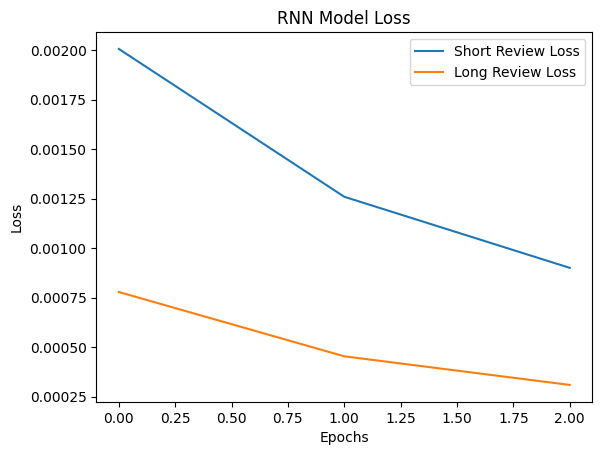

In [35]:
# Ensure that the models have been trained before accessing the loss history
rnn_short_model.fit(X_short_padded, y_short, epochs=3, batch_size=64, validation_split=0.2)
rnn_long_model.fit(X_long_padded, y_long, epochs=3, batch_size=64, validation_split=0.2)

# Plot the loss curve
plt.plot(rnn_short_model.history.history['loss'], label='Short Review Loss')
plt.plot(rnn_long_model.history.history['loss'], label='Long Review Loss')
plt.legend()
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
#針對RNN 做不同長度評論的準確率評估
#分為原始長度為0-100 100-200 200-300 300-400 400-500



In [ ]:
#針對RNN 打亂X_test_padded 中的順序
#如果正確率下降 代表模型對數入序列的記憶能力不強

In [22]:
#first version
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam

def create_gru_model(vocabulary_size, max_length):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 128, input_length=max_length))
    model.add(Conv1D(512, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model


gru_short_model = create_gru_model(vocabulary_size, max_length)
gru_short_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
gru_short_model.fit(X_short_padded, y_short, epochs=5, batch_size=64, validation_split=0.2)
#Print the model summary
gru_short_model.summary()
#Evaluate the model
loss, accuracy = gru_short_model.evaluate(X_test_padded, y_test)
print('Short Review Accuracy:', accuracy)
print('Validation loss:', loss)

gru_long_model = create_gru_model(vocabulary_size, max_length)
gru_long_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
gru_long_model.fit(X_long_padded, y_long, epochs=5, batch_size=64, validation_split=0.2)
#Print the model summary
gru_long_model.summary()
#Evaluate the model
loss, accuracy = gru_long_model.evaluate(X_test_padded, y_test)
print('Long Review Accuracy:', accuracy)
print('Validation loss:', loss)

Epoch 1/5


c:\DL\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.5644 - loss: 0.6837 - val_accuracy: 0.6602 - val_loss: 0.6252
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.7241 - loss: 0.5310 - val_accuracy: 0.8319 - val_loss: 0.4199
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9169 - loss: 0.2504 - val_accuracy: 0.8584 - val_loss: 0.3342
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.9798 - loss: 0.0855 - val_accuracy: 0.8549 - val_loss: 0.3677
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.9962 - loss: 0.0198 - val_accuracy: 0.8372 - val_loss: 0.4434


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 500, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 496, 512)       │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_12         │ (None, 512)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,003,269 (11.46 MB)

 Trainable params: 1,001,089 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,002,180 (7.64 MB)

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8113 - loss: 0.5101
Short Review Accuracy: 0.8153600096702576
Validation loss: 0.4993051588535309
Epoch 1/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 49s 172ms/step - accuracy: 0.6694 - loss: 0.5655 - val_accuracy: 0.8726 - val_loss: 0.3005
Epoch 2/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 68s 244ms/step - accuracy: 0.9238 - loss: 0.1959 - val_accuracy: 0.8900 - val_loss: 0.2680
Epoch 3/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 70s 252ms/step - accuracy: 0.9779 - loss: 0.0787 - val_accuracy: 0.8965 - val_loss: 0.2949
Epoch 4/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 71s 255ms/step - accuracy: 0.9976 - loss: 0.0183 - val_accuracy: 0.8936 - val_loss: 0.3771
Epoch 5/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 71s 255ms/step - accuracy: 0.9993 - loss: 0.0056 - val_accuracy: 0.8938 - val_loss: 0.4081


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 500, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 496, 512)       │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_13         │ (None, 512)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,003,269 (11.46 MB)

 Trainable params: 1,001,089 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,002,180 (7.64 MB)

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8916 - loss: 0.4079
Long Review Accuracy: 0.8937199711799622
Validation loss: 0.3994881212711334


In [ ]:
import matplotlib.pyplot as plt
# Ensure that the models have been trained before accessing the loss history
gru_short_model.fit(X_short_padded, y_short, epochs=3, batch_size=64, validation_split=0.2)
gru_long_model.fit(X_long_padded, y_long, epochs=3, batch_size=64, validation_split=0.2)

# Plot the loss curve
plt.plot(rnn_short_model.history.history['loss'], label='Short Review Loss')
plt.plot(rnn_long_model.history.history['loss'], label='Long Review Loss')
plt.legend()
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
#針對GRU 做不同長度評論的準確率評估
#分為原始長度為0-100 100-200 200-300 300-400 400-500

In [ ]:
#比較GRU 和 LSTM 的性能


In [ ]:
#Compare GRU performance with RNN and CNN

In [ ]:
#Further Experimentation 
#針對GRU模型 使用
#不同的填充方式 前置填充 和 後置填充  和居中填充
#評估方式有
#validation loss
#accuracy
#training time
#efficiency
#只有在短評論上進行實驗 都使用零填充

In [ ]:
#Further Experimentation
#針對GRU模型 使用
#不同的填充值 0 和 1 和隨機填充
#評估方式有
#validation loss
#accuracy
#training time
#efficiency
#只有在短評論上進行實驗 都使用後置填充